# Project: Investigate a Dataset: A look at no-show appointments of patients in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Q1">Question 1</a></li>
<li><a href="#Q2">Question 2</a></li>
<li><a href="#Q3">Question 3</a></li>
<li><a href="#Q4">Question 4</a></li>    
<li><a href="#Q5">Question 5</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data set I chose was the no-show appointments from Brazil. While exploring statistics such as percentage of patients having co-morbidities could be studied with this data set, I also have an interest in public health, so I wanted to see what factors can be associated with missed (no-show) appointments.

- Independent Variables: Scheduling dates, age, alcoholism

- Dependent Variable: Appointment Attendance


### Questions about this dataset:
1. Does the length of time between scheduled date and appointment date correlate with missed appointments?
2. Are there certain patients that repeatedly miss appointments?
3. What conditions (diabetes, hypertension, handicapped) or demographics (gender, age) can be associated with no-show appointments versus non-missed appointments?
4. Does alcholism affect appointment attendance?
5. Do SMS reminders reduce the amount of no-show appointments?

In [2]:
# Import libraries that could be helpful

import csv
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> I needed to see what kind of beast I will be handling: I had to look at the data structure and its types, what kinds of information can I gather and use, etc.

> After downloading the file, I renamed it within my working director to make it shorter while still remaining meaningful. A few columns could have been removed, as I ended up not needing them in the end.

### General Properties

In [3]:
# Load data and print out a few lines. 
# Inspect a few lines to see what we are dealing with.
df=pd.read_csv('noshows2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# check the rows and columns of this dataset
df.shape

(110527, 14)

In [5]:
# Try the pandas.explode() -- hint it won't work because there's no column with tuples

df.explode('PatientID')

KeyError: 'PatientID'

In [7]:
# check datatypes and extraneous columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
# Convert ScheduledDay and AppointmentDay to date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [11]:
# Confirm the conversion
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [12]:
#check each columns' number of unique values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [55]:
# rename some columns to English and confirm the name change
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'},inplace = True)
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No-show                        object
Differences                     int64
RevDifferences                  int64
dtype: object

In [54]:
# look at some basic statistics about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Differences,RevDifferences
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,-10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,-179.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-15.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,6.000000


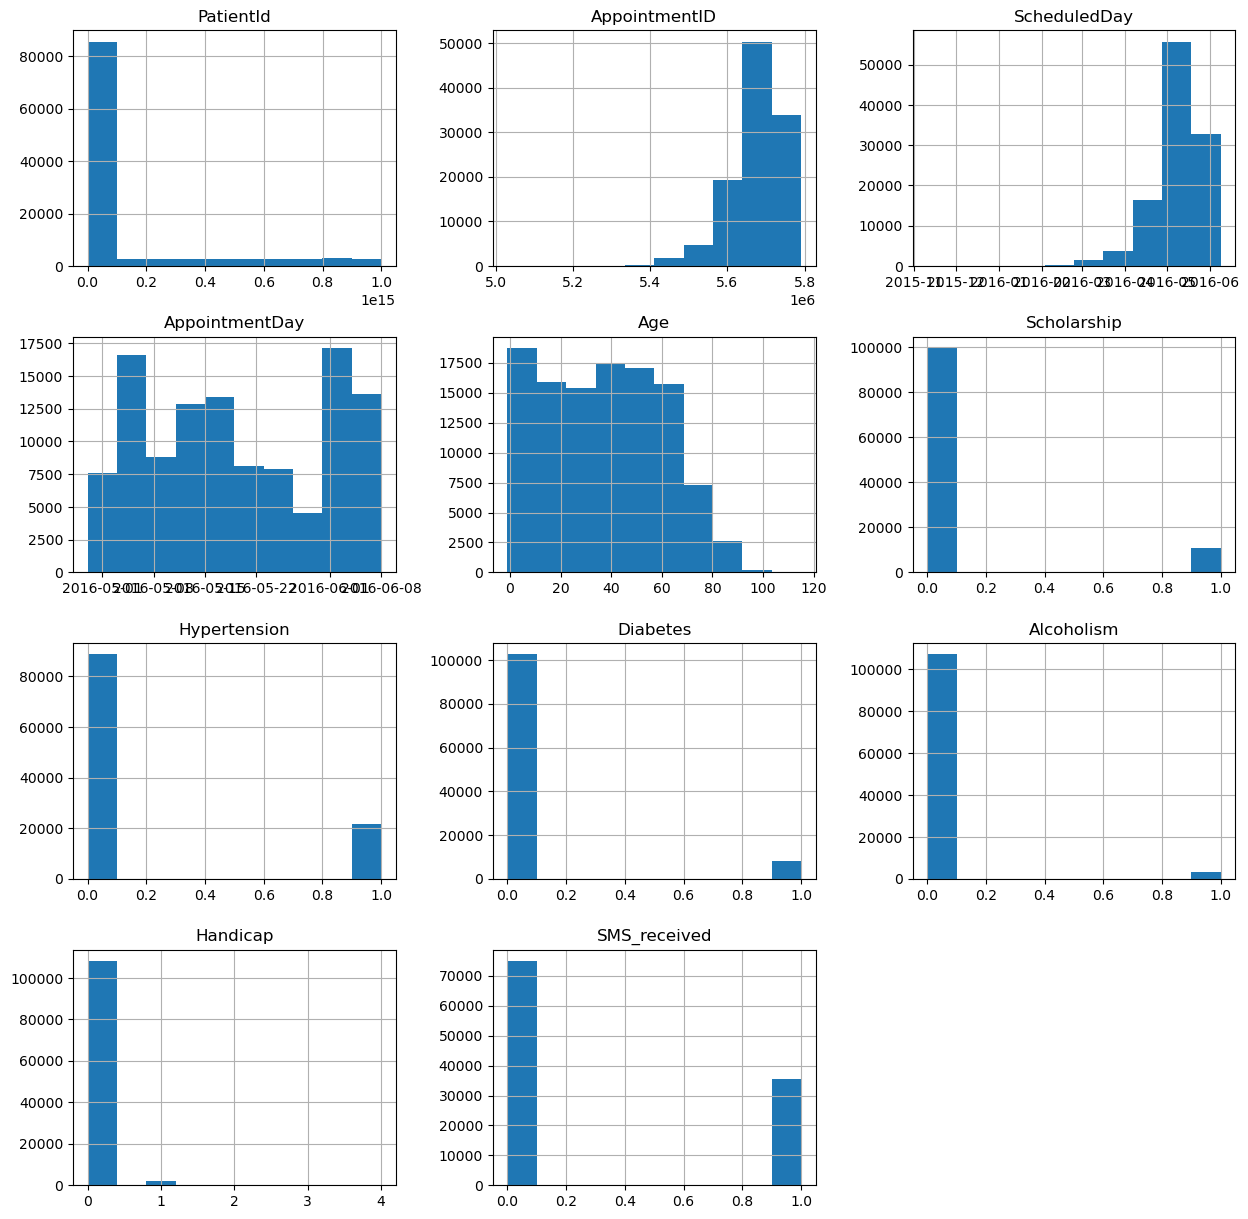

In [15]:
# visualize each variable
df.hist(figsize=(15,15));

So it looks like there are only 27 unique appointment days for 62,299 patients; the time seems to be irrelevant and many people scheduling the same day.

There is no other context for the different values of 'Handicap'.

Also, several PatientIDs have multiple appointment days.


### Data Cleaning 
For this dataset, will have to deal with Null and duplicate values.

In [39]:
# count unique PatientID
#df.nunique(['PatientId'])
uniquePat=len(pd.unique(df['PatientId']))
print("Number of Unique PatientIDs: ",uniquePat)

Number of Unique PatientIDs:  62299


In [17]:
## look for and replace missing data
df.isnull().values.any()

False

In [18]:
## look for duplicate AppointmentIDs
df.duplicated('AppointmentID').sum()

0

In [19]:
# statistic values for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [20]:
# Next, look at some numbers
df.groupby(["SMS_received","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
SMS_received No-show               
0            No               62510
             Yes              12535
1            No               25698
             Yes               9784

In [21]:
df.groupby(["Gender","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Gender No-show               
F      No               57246
       Yes              14594
M      No               30962
       Yes               7725

In [22]:
df.groupby(["Hypertension","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Hypertension No-show               
0            No               70179
             Yes              18547
1            No               18029
             Yes               3772

In [23]:
df.groupby(["Scholarship","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Scholarship No-show               
0           No               79925
            Yes              19741
1           No                8283
            Yes               2578

In [24]:
df.groupby(["Diabetes","No-show"]).agg({"AppointmentID":"count"})

AppointmentID
Diabetes No-show               
0        No               81695
         Yes              20889
1        No                6513
         Yes               1430

<a id='eda'></a>
## Exploratory Data Analysis

All questions revolved around patients with no-show (missed) appointments and non-missed (attended) appointments, so it was important to segment that out early.

<a id='Q1'></a>
## Research Question 1: Does the length of time between scheduled date and appointment date correlate with missed appointments?

First, I need to establish the length of time between the two dates for each patient


In [47]:
#df['Differences'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df['RevDifferences'] = (df['ScheduledDay'] - df['AppointmentDay']).dt.days
# And confirm the calculations are added

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Differences,RevDifferences
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1,0


Second, separate the no-shows from those that did not miss their appointments ("no-miss").

In [43]:
# separate data into no-shows and no-misses; count the records
no_show = df[df['No-show'].isin(['Yes'])]
print("Total number of No-Show appointments: ", no_show['AppointmentID'].count())

Total number of No-Show appointments:  22319


In [42]:
no_miss = df[df['No-show'].isin(['No'])]
print("Total number of Non-Missed appointments: ", no_miss['AppointmentID'].count())

Total number of Non-Missed appointments:  88208


In [51]:
# calculate the average days between Appointment Day and Scheduled Day
no_showMean = no_show['Differences'].mean()
no_missMean = no_miss['Differences'].mean()
print("Average days between Schedule Day and Appointment Day for No-Shows: ", no_showMean)
print("Average days between Schedule Day and Appointment Day for Non-Missed: ",no_missMean)

Average days between Schedule Day and Appointment Day for No-Shows:  14.83148886598862
Average days between Schedule Day and Appointment Day for Non-Missed:  7.754659441320515


In [53]:
# calculate the average days between Appointment Day and Scheduled Day
no_showMeanRev = no_show['RevDifferences'].mean()
no_missMeanRev = no_miss['RevDifferences'].mean()
print("Average days between Schedule Day and Appointment Day for No-Shows: ", no_showMean)
print("Average days between Schedule Day and Appointment Day for Non-Missed: ",no_missMean)

KeyError: 'RevDifferences'

[Text(0.5, 0, 'No-show Appointment'),
 Text(0, 0.5, 'Average Days Between Set Date and Appointment')]

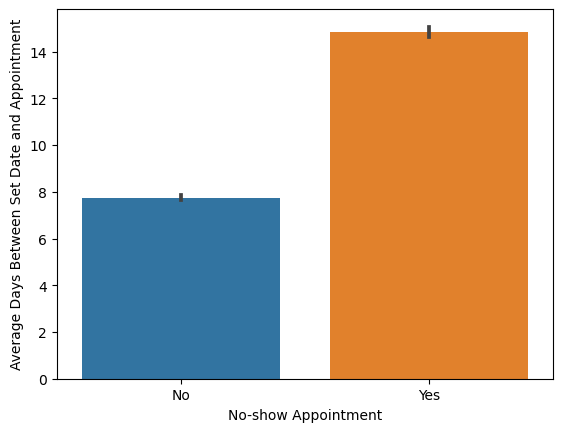

In [29]:
# create a boxplot to show the variance of the values
Ddiff = sns.barplot(y='Differences',x='No-show',data=df)
Ddiff.set(xlabel='No-show Appointment',ylabel='Average Days Between Set Date and Appointment')

[Text(0.5, 0, 'No-show Appointment'),
 Text(0, 0.5, 'Average Days Between Set Date and Appointment')]

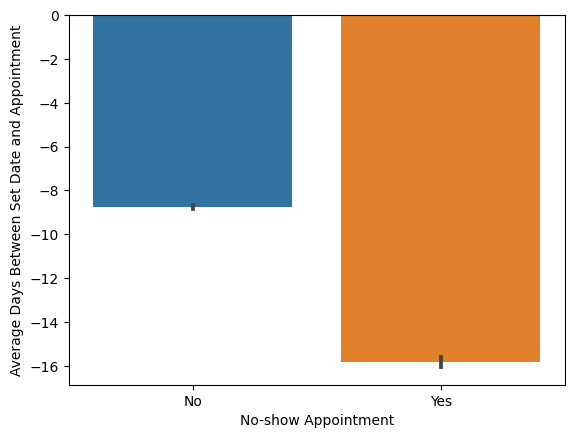

In [49]:
# create a boxplot to show the variance of the values
Ddiff = sns.barplot(y='RevDifferences',x='No-show',data=df)
Ddiff.set(xlabel='No-show Appointment',ylabel='Average Days Between Set Date and Appointment')

##### Conclusion for Q1: Does the length of time between scheduled date and appointment date correlate with missed appointments?
The barplot shows that those that miss their appointments ('No-show') have, on average, 14 days between their scheduled date and appointment date. On the other hand, those that did not miss their appointment, on average, only had a week (7 days) between their scheduled date and appointment.

In [ ]:
# Insert some statistics to prove it

<a id='Q2'></a>
## Research Question 2  Are there certain patients that repeatedly miss appointments?

This question involves looking at duplicate PatientIds, since all entries have unique AppointmentIDs. First, I will have to determine duplicate and unique PatientId values from no_show and no_miss. Then determine the percentage of total that have multiple appointments (AppointmentIDs). Could also ask: Are no-shows more likely to miss again? Ask, what percentage of all appointments are missed?

In [30]:
# Determine which PatientIds are duplicated in each list
no_showDup = no_show[no_show.duplicated(['PatientId'], keep = False)]
no_missDup = no_miss[no_miss.duplicated(['PatientId'], keep = False)]

In [35]:
# Visualize list of PatientIds that had more than one missed appointment
no_showDup.groupby(["PatientId"]).agg({"AppointmentID":"count"})

,AppointmentID
PatientId,
1.224513e+08,2
5.225847e+08,3
2.237714e+09,2
3.996325e+09,3
4.211396e+09,3
...,...
9.972256e+14,4
9.975988e+14,2
9.982316e+14,2


This code shows that 3,226 unique Patients have missed at least 2 appointments.

In [32]:
# Visualize list of PatientIds that had more than one non-missed appointment
no_missDup.groupby(["PatientId"]).agg({"AppointmentID":"count"})

,AppointmentID
PatientId,
2.263866e+07,2
5.216894e+07,2
7.922850e+07,2
1.562232e+08,2
1.781682e+08,2
...,...
9.996275e+14,3
9.997437e+14,2
9.998318e+14,4


Overall, however, 18,444 Patients will return for another appointment

In [33]:
## CALCULATIONS FOR NO-SHOWS
# total count of all unique no-shows 
no_showCnt = no_show['PatientId'].nunique()

# total count of all unique no-shows that had more than one missed appointment
no_showDupCnt = no_showDup['PatientId'].nunique()
print("No-Show Repeats: ", no_showDupCnt)

# total count of all unique no-shows that only missed one appointment ('solos')
no_showUCnt =  no_showCnt - no_showDupCnt

# percentage of duplicate no-shows out of all no-shows
no_showPer = (no_showDupCnt/no_showCnt)*100


No-Show Repeats:  3226


In [34]:
## CALCULATIONS FOR NO-MISSES

# total count of all unique non-missed appointments
no_missCnt = no_miss['PatientId'].nunique()

# total count of all unique PatientId's that attended more than one appointments
no_missDupCnt = no_missDup['PatientId'].nunique()

# total count of all unique non-missed appointments only attended once ('solos')
no_missUCnt = no_missCnt - no_missDupCnt

#percentage of duplicate no-misses out of all non-missed
no_missPer = (no_missDupCnt/no_missCnt)*100

In [ ]:
# total count of all unique PatientIds
all_PatientIds = df['PatientId'].nunique()
print("All Patients: ",all_PatientIds)
print("No-Show Repeats as % of All: ", (no_showDupCnt/all_PatientIds)*100)
# Confirm the percentages
print(no_showPer)
print(no_missPer)

In [ ]:
# no-show graph
repeats = ['repeats','uniques']
# include unique duplicates and unique solos
noshows = [no_showDupCnt,no_showUCnt]
nomiss = [no_missDupCnt,no_missUCnt]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


plt.subplot(1,2,1)
plt.pie(noshows, labels = repeats, autopct='%1.2f%%')
plt.title("No Show Patients")

plt.subplot(1,2,2)
plt.pie(nomiss, labels = repeats, autopct='%1.2f%%')
plt.title("No Miss Patients");

### Conclusion Q2:  Are there certain patients that repeatedly miss appointments?
It appears that patients who do not miss their appointments are more likely to return compared to those that have missed at least one appointment; that is, the number of patients that return (No-Miss Repeats) is greater than the number of patients that have missed more than one appointments (No-Show Repeats).

Of all the no-show appointments, 18% are repeat patients; of the no-miss appointments, 34% are repeat patients. Overall, the majority of all appointments are unique individuals. This can be interpreted as the majority of  No-Show appointments simply being one-offs with patients, with a small subset of all patients (~5%) missing more than one appointment. 

However, these two groups are not mutually exclusive, as some PatientIds can have least 1 no-show and 1 no-miss appointment. In fact, the number of missed and attended appointments can vary per PatientId (e.g., 3 attended appointments with 1 miss)

In [ ]:
#Calculate the number of PatientIds that are in both no-miss and no-show
common = no_miss.merge(no_show, on=['PatientId'])
result2 = df[df['PatientId'].isin(common.PatientId)]
result2['PatientId'].nunique()

In [ ]:
# List of PatientIds that have both Missed and Attended Appointments
result2.groupby(["PatientId","No-show"]).agg({"AppointmentID":"count"})

<a id='Q3'></a>
## Research Question 3: What conditions (diabetes, hypertension, handicapped, alcoholism) or demographics (gender, age) can be associated with no-show appointments versus non-missed appointments?

First, Decide on what factors could be influential.

In [ ]:
# Visualize some characteristics
no_miss.hist(figsize=(15,15));

In [ ]:
no_show.hist(figsize=(15,15));

Visually, Age seems to be skewed towards older patients in non-missed appointments and younger patients for No-shows; let's quantify.

In [ ]:
# statistics on the no-show group
print(no_show['Age'].describe())
print("Median: ",no_show['Age'].median())

In [ ]:
# statistics on non-missed group
print(no_miss['Age'].describe())
print("Median: ", no_miss['Age'].median())

In [ ]:
# Let's visualize this:
fig, axes = plt.subplots(1,2)
no_show['Age'].hist(bins = 10, ax=axes[0])
axes[0].set_title('No-Shows')
no_miss['Age'].hist(bins =10, ax=axes[1])
axes[1].set_title('No-Misses');
#plt.hist(no_show['Age'],bins=10, label="No-shows")
#plt.hist(no_miss['Age'],bins=10, label="No-Miss");

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(no_miss['Age'],bins=10,  label="No-Miss")
plt.hist(no_show['Age'],bins=10, label="No-shows")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.title("Age Distribution for all Appointments");

In [ ]:
# How much do the no-shows represent the whole group?
(len(no_show)/len(df))*100

### Conclusion Q3.  What conditions (diabetes, hypertension, handicapped, alcoholism) or demographics (gender, age) can be associated with no-show appointments over non-missed appointments?
On average, the age of no-shows is younger than non-missed appointments, 34 and 38 respectively. The relative amount of no-show appointments to non-missed appointments should be also be noted as the former only represents about 20% of all recorded appointments.

<a id='Q4'></a>
## Research Question 4. Does alcholism affect appointment attendance?
I want to investigate whether alcoholism relates to a patient missing a scheduled appointment more often than those without alcoholism.

In [ ]:
# Determine how many appointments had a Alcoholism patient
# Determine how many of those patients missed an appointment
tot_Alcoholism = df[df['Alcoholism'].isin([1])]
ns_Alcoholism = tot_Alcoholism[tot_Alcoholism['No-show'].isin(['Yes'])]
nm_Alcoholism = tot_Alcoholism[tot_Alcoholism['No-show'].isin(['No'])]

tot_nonAlc = df[df['Alcoholism'].isin([0])]
ns_nonAlc = tot_nonAlc[tot_nonAlc['No-show'].isin(['Yes'])]
nm_nonAlc = tot_nonAlc[tot_nonAlc['No-show'].isin(['No'])]

In [ ]:
# Calculate the percentages
A_noShow = (ns_Alcoholism['AppointmentID'].count()/tot_Alcoholism['AppointmentID'].count())*100
A_noMiss = (nm_Alcoholism['AppointmentID'].count()/tot_Alcoholism['AppointmentID'].count())*100

N_noShow = (ns_nonAlc['AppointmentID'].count()/tot_nonAlc['AppointmentID'].count())*100
N_noMiss = (nm_nonAlc['AppointmentID'].count()/tot_nonAlc['AppointmentID'].count())*100

In [ ]:
#no show graph
missed = ['No-show','No-miss']
# include unique duplicates and unique solos
alcoholic = [A_noShow,A_noMiss]
non_alcoholic = [N_noShow,N_noMiss]

plt.subplot(1,2,1)
plt.pie(alcoholic, labels = missed, autopct=lambda pct: func(pct, alcoholic))
plt.title("Patients with Alcoholism")

plt.subplot(1,2,2)
plt.pie(non_alcoholic, labels = missed, autopct=lambda pct: func(pct, non_alcoholic))
plt.title("Patients without Alcoholism");

### Conclusion Q3: Does alcholism affect appointment attendance?

The difference in the percentage of no shows and non-missed appointments between patients with and without alcoholism is negligible. It appears that having alcoholism does not relate to an increase in no-show appointments.

<a id='Q5'></a>
## Research Question 4. Do SMS reminders reduce the amount of no-show appointments?
We can see from above that there is a significant drop in no-show appointment when an SMS is received; let's quantify

In [ ]:
df.groupby(["SMS_received","No-show"]).agg({"AppointmentID":"count"})

In [ ]:
# Segment out the SMS recipients per no-show/no-miss group
ns_SMSy = no_show[no_show['SMS_received'].isin(['1'])]
ns_SMSy = ns_SMSy['AppointmentID'].count()
ns_SMSn = no_show[no_show['SMS_received'].isin(['0'])]
ns_SMSn = ns_SMSn['AppointmentID'].count()

nm_SMSy = no_miss[no_miss['SMS_received'].isin(['1'])]
nm_SMSy = nm_SMSy['AppointmentID'].count()
nm_SMSn = no_miss[no_miss['SMS_received'].isin(['0'])]
nm_SMSn = nm_SMSn['AppointmentID'].count()

# Confirm it matches the above
print("No-Miss, no SMS: ", nm_SMSn)
print("No-Show, no SMS: ", ns_SMSn)
print("No-Miss, SMS: ", nm_SMSy)
print("No-Show, SMS: ", ns_SMSy)

In [ ]:
# Graph each group separately
YN = ['Yes','No']
recSMS = [ns_SMSy,nm_SMSy]
noSMS = [ns_SMSn,nm_SMSn]
noShowYN = [ns_SMSy,ns_SMSn]

plt.subplot(1,3,1)
plt.pie(recSMS, labels = YN, autopct=lambda pct: func(pct, recSMS))
plt.title("Received SMS \n No-Show?")

plt.subplot(1,3,2)
plt.pie(noSMS, labels = YN, autopct=lambda pct: func(pct, noSMS))
plt.title("Did Not Receive SMS \n No-Show?")


plt.subplot(1,3,3)
plt.pie(noShowYN, labels = YN,autopct=lambda pct: func(pct, noShowYN))
plt.title("No-Shows \n Recieved SMS?");


In [ ]:
#Graph all appointments as a whole
noshowSMS1 = ['No-Show, SMS','No-Miss, SMS', 'No-Show, No SMS','No-Miss, No SMS']
AllSMS = [ns_SMSy,nm_SMSy,ns_SMSn,nm_SMSn]

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.pie(AllSMS, labels = noshowSMS1, autopct=lambda pct: func(pct,AllSMS));

### Conclusion Q4.  Do SMS reminders reduce the amount of no-show appointments?
The number of no-show appointment that received an SMS message is much smaller than the no-shows that did not receive an SMS (9,784 and 12,535 respectively). While the majority of those who received an SMS message did not miss their appointments (83.3%), of all no-show appointments, more than half (56.2%) did not receive an SMS message.

Moreover, more than half of all appointments overall did not receive an SMS message and still did not miss their appointment (56.6%; 62,510; "No-Miss, No SMS)

<a id='conclusions'></a>
## Conclusions
Based on the above research questions, I can conclude:
1. Only 1/5 of all appointments are no-shows, while an additionaly 19% of those miss appointments more than once.
2. Not all entries in the table are singular events: some patients miss more than one appointment, attend more than one appointment, or have both a missed and attended appointment.
3. No-show patients are more likely to be younger than those that do not miss appointments.
4. Alcoholism does not relate to a patient's ability to attend a scheduled appointment.
5. People are more likely to no-show if they did not receive an SMS message.

## Limitations
This data set does not explore the actual reasons why a person would miss an appointment -- it merely reports characteristics of the patient and some detail about the appointment (e.g., scheduled date, SMS reminder).  There are multiple reasons to cause no-shows and the combination of any number of factors can relate to this. 

Without additional information I could not use starting geographic location, since I am not familiar with the local area of Brazil; statistics for crime rate, access to transportation, etc. could affect appointment attendance, but the data was not available.

I could speculate why younger patients had more no-shows: perhaps they did not have an adult to transport them or had school during the appointment time -- a question that could probably be probed with data analysis but not performed in this report. However, in the end, there is not enough information to explain the cause of the age differences.